<a href="https://colab.research.google.com/github/ankynator/AnimacionesParaLaWEB/blob/master/Nube-palabras-semantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install wikipedia
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import wikipedia
import random

#spacy
import spacy
import es_core_news_sm
import es_core_news_md
nlp = es_core_news_sm.load()

In [20]:
wikipedia.set_lang("es")
value=input("Ingrese palabra: ")
try:
    m=wikipedia.search(value,3)
    p=wikipedia.summary(m[0],sentences=3)
    print(p)
except wikipedia.exceptions.DisambiguationError as e:
    s=random.choice(e.options)
    p=wikipedia.summary(s,sentences=2)
    #print(p)

Ingrese palabra: miss mundo
Miss Mundo es un título de belleza femenina. También se conoce así al certamen que lo confiere y que se celebra anualmente. 
Cada concursante representa únicamente a su nación de origen y la ganadora del título lo lleva por el periodo de alrededor de un año, añadiendo a él, el año en que lo ganó.


In [21]:
doc = nlp(p)
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [22]:
for token in doc:
  print(token.text,'->', token.pos_)

Miss -> PROPN
Mundo -> PROPN
es -> AUX
un -> DET
título -> NOUN
de -> ADP
belleza -> NOUN
femenina -> ADJ
. -> PUNCT
También -> ADV
se -> PRON
conoce -> VERB
así -> ADV
al -> ADP
certamen -> NOUN
que -> SCONJ
lo -> PRON
confiere -> VERB
y -> CONJ
que -> SCONJ
se -> PRON
celebra -> VERB
anualmente -> ADV
. -> PUNCT

 -> SPACE
Cada -> DET
concursante -> ADJ
representa -> VERB
únicamente -> ADV
a -> ADP
su -> DET
nación -> NOUN
de -> ADP
origen -> NOUN
y -> CONJ
la -> DET
ganadora -> NOUN
del -> ADP
título -> NOUN
lo -> PRON
lleva -> VERB
por -> ADP
el -> DET
periodo -> NOUN
de -> ADP
alrededor -> ADV
de -> ADP
un -> DET
año -> NOUN
, -> PUNCT
añadiendo -> VERB
a -> ADP
él -> PRON
, -> PUNCT
el -> DET
año -> NOUN
en -> ADP
que -> PRON
lo -> PRON
ganó -> VERB
. -> PUNCT


In [23]:
from spacy.matcher import Matcher
matcher_full_name = Matcher(nlp.vocab)
matcher_noun_propn = Matcher(nlp.vocab)
matcher_noun_adj = Matcher(nlp.vocab)
matcher_verb = Matcher(nlp.vocab)

def full_name(nlp_doc):
     pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
     matcher_full_name.add('FULL_NAME', None, pattern)
     matches = matcher_full_name(nlp_doc)
     return matches


def noun_propn(nlp_doc):
     pattern = [{'POS': 'NOUN'}, {'POS': 'PROPN'}]
     matcher_noun_propn.add('NOUN_PROPN', None, pattern)
     matches = matcher_noun_propn(nlp_doc)
     return matches


def noun_adj(nlp_doc):
     pattern = [{'POS': 'NOUN'}, {'POS': 'ADJ'}]
     matcher_noun_adj.add('NOUN_ADJ', None, pattern)
     matches = matcher_noun_adj(nlp_doc)
     return matches


def verb(nlp_doc):
     pattern = [{'POS': 'VERB'}]
     matcher_verb.add('VERB', None, pattern)
     matches = matcher_verb(nlp_doc)
     return matches

In [24]:
con_significado = {}

matches_fn = full_name(doc)
matches_np = noun_propn(doc)
matches_na = noun_adj(doc)
matches_ve = verb(doc)

for match_id, start, end in matches_fn:
  span = doc[start: end]
  con_significado[span.text] = 1

for match_id, start, end in matches_np:
  span = doc[start: end]
  con_significado[span.text] = 2

for match_id, start, end in matches_na:
  span = doc[start: end]
  con_significado[span.text] = 1

for match_id, start, end in matches_ve:
  span = doc[start: end]
  con_significado[span.text] = 1

con_significado

{'Miss Mundo': 1,
 'añadiendo': 1,
 'belleza femenina': 1,
 'celebra': 1,
 'confiere': 1,
 'conoce': 1,
 'ganó': 1,
 'lleva': 1,
 'representa': 1}

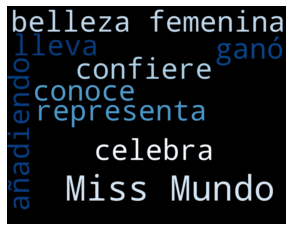

Miss Mundo es un título de belleza femenina. También se conoce así al certamen que lo confiere y que se celebra anualmente. 
Cada concursante representa únicamente a su nación de origen y la ganadora del título lo lleva por el periodo de alrededor de un año, añadiendo a él, el año en que lo ganó.


In [26]:
#generamos la nube
wc = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=18)

wc.generate_from_frequencies(con_significado)

#mostramos la nube
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

print(p)